In [1]:
%matplotlib inline
import os
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pyGadget

In [2]:
from matplotlib.colors import LogNorm

In [3]:
sns.set(context='poster', style='white', font='serif', font_scale=1.)
mpl.rc('text', usetex=True)
#mpl.rc('font', size=20.)
#mpl.rc('font', family='serif')
#mpl.rc('text', usetex=True)

In [4]:
#snap.close()
sim = pyGadget.sim.Simulation('halo2/small',length='pc',refine=False,coordinates='physical',units_over_h=False)
snap = sim.load_snapshot(175)

In [5]:
snap.gas.load_masses()
snap.gas.load_number_density()
snap.gas.calculate_temperature()
snap.gas.load_coords()
snap.gas.cleanup('masses', 'ndensity', 'temperature', 'coordinates', 'r_sph')
snap.dm.load_masses()
snap.dm.load_coords()

In [6]:
snap.gas.describe()

,masses,ndensity,temperature,x,y,z
count,3.374720e+05,337472.000000,337472.000000,337472.000000,337472.000000,337472.000000
mean,2.884917e-02,683812.264184,326.839996,4.775380,5.283204,5.151678
std,1.125039e-13,3886249.899777,144.104186,1.952951,2.191569,2.176779
min,2.884917e-02,9.225674,76.514175,-4.828331,-4.477334,-3.544651
25%,2.884917e-02,241.185917,224.272973,3.786063,4.202469,4.274094
50%,2.884917e-02,785.554756,288.065816,4.975823,5.039026,5.119286
75%,2.884917e-02,6736.770497,395.735665,5.619736,6.576212,6.267540
max,2.884917e-02,56595445.796534,1311.403583,14.503051,13.071569,15.722834


In [7]:
snap.dm.describe()

,masses,x,y,z
count,5.310000e+02,531.000000,531.000000,531.000000
mean,1.200125e+01,5.584490,5.103184,4.181650
std,1.191281e-13,2.842833,2.611802,2.809597
min,1.200125e+01,0.003136,0.053276,0.000544
25%,1.200125e+01,3.342759,3.055236,1.872199
50%,1.200125e+01,5.754238,5.078596,3.851406
75%,1.200125e+01,8.163755,7.232058,6.527040
max,1.200125e+01,9.998785,9.896416,9.892345


In [8]:
center = snap.gas.iloc[snap.gas.ndensity.argmax()][['x', 'y', 'z']]
print center.x, center.y, center.z
center.values

4.99885759466 4.98482328167 5.00637275812


array([ 4.99885759,  4.98482328,  5.00637276])

In [9]:
gb = snap.gas.groupby(snap.gas.masses)

In [10]:
gb.count()

,ndensity,temperature,x,y,z
masses,,,,,
0.028849,337472,337472,337472,337472,337472


In [11]:
gb.max()

,ndensity,temperature,x,y,z
masses,,,,,
0.028849,56595445.796534,1311.403583,14.503051,13.071569,15.722834


In [12]:
gb.min()

,ndensity,temperature,x,y,z
masses,,,,,
0.028849,9.225674,76.514175,-4.828331,-4.477334,-3.544651


In [13]:
gb.median()

,ndensity,temperature,x,y,z
masses,,,,,
0.028849,785.554756,288.065816,4.975823,5.039026,5.119286


In [14]:
masses = gb.groups.keys()
masses.sort()
masses

[0.028849170076648636]

In [15]:
#cmaps = ['Greys_r', 'Blues_r', 'Greens_r', 'Reds_r', 'Oranges_r', 'Purples_r']
cmaps = [sns.cubehelix_palette(len(masses), start=x, as_cmap=True, reverse=False, rot=0) 
         for x in np.linspace(0,3,len(masses)+1)[:-1]]

In [16]:
N=250
rbins = np.logspace(-1,5,N)
nbins = np.logspace(-4,12,N)
tbins = np.logspace(1,np.log10(2e4),N)

/home/jhummel/anaconda/lib/python2.7/site-packages/matplotlib/image.py:359: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


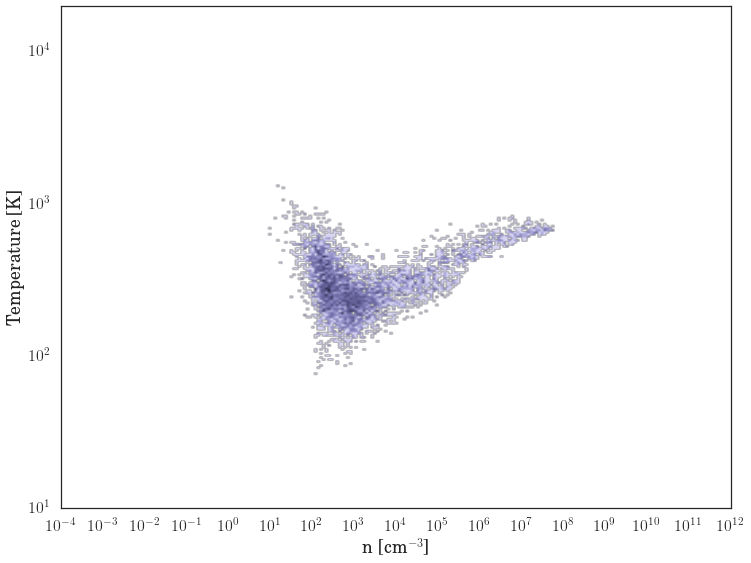

In [17]:
fig,ax = plt.subplots(figsize=(12,9))
for i, mass in enumerate(masses):
    df = gb.get_group(mass)
    heatmap, xedges, yedges = np.histogram2d(df.temperature, df.ndensity, bins=(tbins,nbins))
    extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
    ax.imshow(heatmap, origin='lower', norm=LogNorm(), extent=extent, cmap=cmaps[i])
ax.set(xscale='log', yscale='log', aspect='auto')
ax.set_xlabel('n [cm$^{-3}$]')
ax.set_ylabel('Temperature [K]')
plt.savefig('figures/refinement/T-n_levels.png', bbox_inches='tight')

In [18]:
masses#[:1]

[0.028849170076648636]

In [19]:
N = 750
xbins = np.linspace(snap.gas.x.min(), snap.gas.x.max(), N)
ybins = np.linspace(snap.gas.y.min(), snap.gas.y.max(), N)
zbins = np.linspace(snap.gas.z.min(), snap.gas.z.max(), N)

[-4.4773335596622879, 13.071569151817728, -4.8283307906183133, 14.50305061231847]


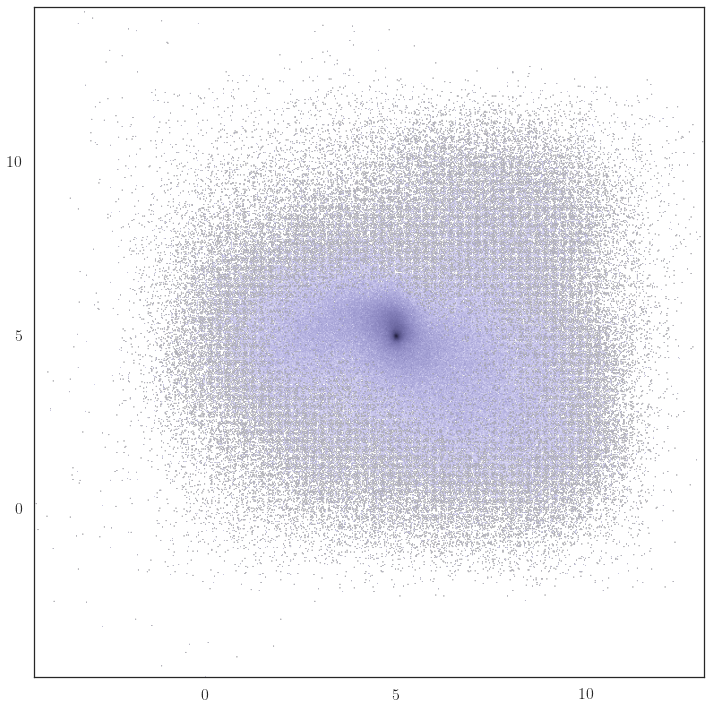

In [20]:
fig,ax = plt.subplots(figsize=(12,12))
for i, mass in enumerate(masses[::-1]):
    df = gb.get_group(mass)
    heatmap, xedges, yedges = np.histogram2d(df.x, df.y, bins=(xbins,ybins))
    extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
    ax.imshow(heatmap, origin='lower', norm=LogNorm(), extent=extent, cmap=cmaps[i])
ax.set_aspect('auto')
print extent
#plt.savefig('figures/refinement/levels.png', bbox_inches='tight')

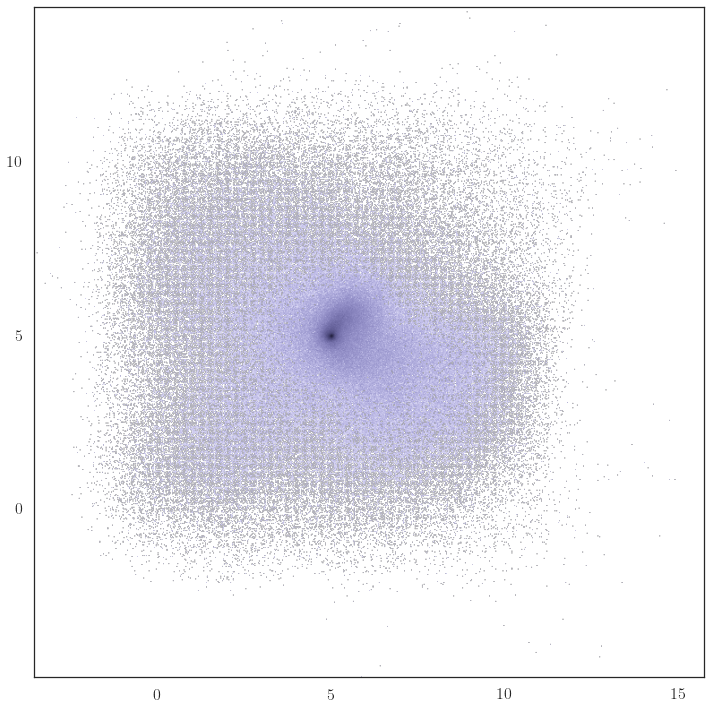

In [21]:
fig,ax = plt.subplots(figsize=(12,12))
for i, mass in enumerate(masses[::-1]):
    df = gb.get_group(mass)
    heatmap, xedges, yedges = np.histogram2d(df.x, df.z, bins=(xbins,zbins))
    extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
    ax.imshow(heatmap, origin='lower', norm=LogNorm(), extent=extent, cmap=cmaps[i])
ax.set_aspect('auto')

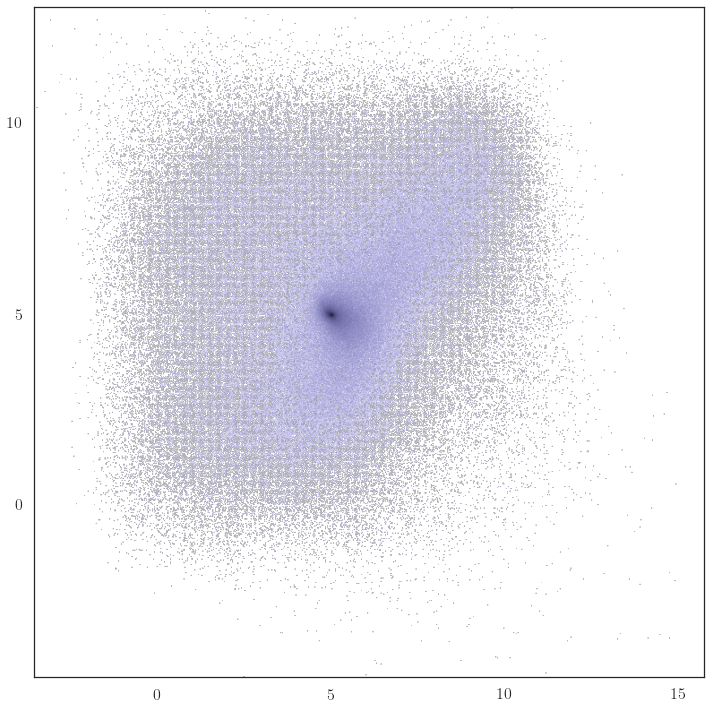

In [22]:
fig,ax = plt.subplots(figsize=(12,12))
for i, mass in enumerate(masses[::-1]):
    df = gb.get_group(mass)
    heatmap, xedges, yedges = np.histogram2d(df.y, df.z, bins=(ybins,zbins))
    extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
    ax.imshow(heatmap, origin='lower', norm=LogNorm(), extent=extent, cmap=cmaps[i])
ax.set_aspect('auto')